In [2]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy import stats
import scipy.signal as sg
import matplotlib.pyplot as plt
import pickle
import matplotlib.cm as cm

plt.rcParams.update({'font.size': 13})

# Characteristic frequencies

In [3]:
with open('../support_data/bvs_lucky.pkl', 'rb') as f:
    ambient_stratification = pickle.load(f)
    
z = ambient_stratification['z']
bvf = ambient_stratification['BVF']

jj = np.where(z == 1025)
print(bvf[jj].data[0])
bvf_lucky_1000 = bvf[jj].data[0]*3600*24 #day^-1 
bvf_lucky_1000

0.0032020476471068707


276.6569167100336

In [4]:
lat = 37 + .17/.6
sbe = (3600*24)/360
f = 2*np.sin(lat*np.pi/180)
M2 = 24/12.42# 1/(12.42*3600) # M2
S2 = 2
M4 = 24/6.21
M6 = 24/4.14
week = 1./7 # yeah, weekly freq.
month = 1./30 # yeah, monthly freq.
yearly = 1./365 # yeah, annual freq.

upper_tick_locations = np.array([bvf_lucky_1000, M2, M4, M6, f, week, month, yearly])
upper_tick_labels = ['N', 'M2', 'M4', 'M6', 'f', 'week', 'month', 'year']

# SBE 1000m deep

In [12]:
temp_1000 = {}
i_level = 1000
tolerance = 10

for y in range(2011,2020):
    if y == 2018:
        # just realized that 2018  at 1000m doesn't make sense at all!
        continue
        
    with Dataset(f'../netcdf/{y}/sbe.nc', 'r') as nc:
        
        depth_y = list(nc['DEPTH'][:])
        level_label = None
        
        for d_i in range(i_level - tolerance, i_level + tolerance):
            if d_i in depth_y:
                level_label = str(d_i)
                
        try:
            temp_1000[y] = np.array(nc[level_label]['TEMP'][:])
        except:
            print(f'{y} has no {i_level}m ± {tolerance}m level')

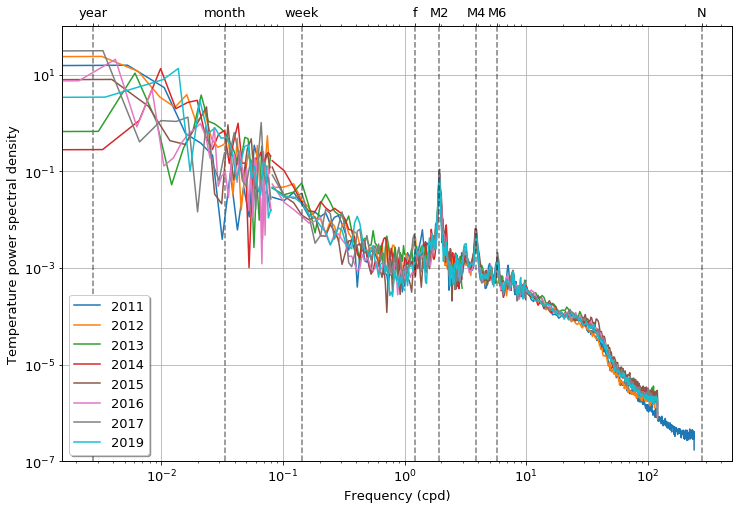

In [14]:
x_colors = np.linspace(0,1, 9)
colors = cm.get_cmap('tab10')(x_colors)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

lims = [10, 3, 1, 0.08]

for l, year in enumerate(range(2011, 2020)):
    if year == 2011:
        dt = 180/(3600*24) # 2011 has a period of 180s
    elif year == 2018:
        continue
    else:
        dt = 360/(3600*24) # convert to days days! the rest is 360s
        
    windows = np.array([2, 10, 35, 49])/dt
    temp = temp_1000[year]
    freq, psd = sg.periodogram(temp, fs=1./dt)
    ind, = np.where(freq < lims[-1])
    ax2.loglog(freq[ind], psd[ind], alpha=1, c=colors[l])

    freq, psd = sg.welch(temp, fs=1./dt, window='hanning', nperseg=windows[0], noverlap=0.15)
    ind, = np.where(freq >= lims[0])
    ax1.loglog(freq[ind], psd[ind], c=colors[l], label=year)
    ax2.loglog(freq[ind], psd[ind], alpha=0)

    for i in range(1,len(lims)):
        freq, psd = sg.welch(temp, fs=1./dt, window='hanning', nperseg=windows[i], noverlap=0.15)
        ind, = np.where(((freq >= lims[i]) & (freq < lims[i-1])))
        ax1.loglog(freq[ind], psd[ind], c=colors[l])
        #ax2.loglog(freq[ind], psd[ind], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)')
ax1.set_ylabel(r'Temperature power spectral density')
ax1.set_ylim(1e-7, 1e2)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
#### SAVE THIS ####

# 1700m deep

In [19]:
temp_1700 = {}
i_level = 1688
tolerance = 5

for y in range(2011,2020):
    with Dataset(f'../netcdf/{y}/sbe.nc', 'r') as nc:
        
        depth_y = list(nc['DEPTH'][:])
        level_label = None
        
        for d_i in range(i_level - tolerance, i_level + tolerance):
            if d_i in depth_y:
                level_label = str(d_i)
                
        try:
            temp_1700[y] = np.array(nc[level_label]['TEMP'][:])
        except:
            print(f'{y} has no {i_level}m ± {tolerance}m level')


2014 has no 1688m ± 5m level


In [17]:
jj = np.where(z == 1025)
print(bvf[jj].data[0])
bvf_lucky_1700 = bvf[jj].data[0]*3600*24 #day^-1 
bvf_lucky_1700

lat = 37 + .17/.6
sbe = (3600*24)/360
f = 2*np.sin(lat*np.pi/180)
M2 = 24/12.42# 1/(12.42*3600) # M2
S2 = 2
M4 = 24/6.21
M6 = 24/4.14
week = 1./7 # yeah, weekly freq.
month = 1./30 # yeah, monthly freq.
yearly = 1./365 # yeah, annual freq.

upper_tick_locations = np.array([bvf_lucky_1700, M2, M4, M6, f, week, month, yearly])
upper_tick_labels = ['N', 'M2', 'M4', 'M6', 'f', 'week', 'month', 'year']

0.0032020476471068707


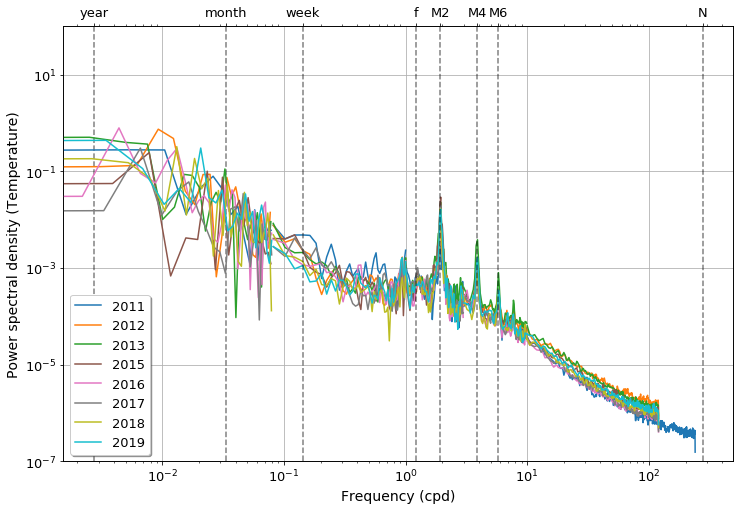

In [23]:
x_colors = np.linspace(0,1, 9)
colors = cm.get_cmap('tab10')(x_colors)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

lims = [10, 3, 1, 0.08]

for l, year in enumerate(range(2011, 2020)):
    if year == 2011:
        dt = 180/(3600*24) # 2011 has a period of 180s
    elif year == 2014:
        continue
    else:
        dt = 360/(3600*24) # convert to days days! the rest is 360s
        
    windows = np.array([2, 10, 35, 49])/dt
    temp = temp_1700[year]
    freq, psd = sg.periodogram(temp, fs=1./dt)
    ind, = np.where(freq < lims[-1])
    ax2.loglog(freq[ind], psd[ind], alpha=1, c=colors[l])

    freq, psd = sg.welch(temp, fs=1./dt, window='hanning', nperseg=windows[0], noverlap=0.15)
    ind, = np.where(freq >= lims[0])
    ax1.loglog(freq[ind], psd[ind], c=colors[l], label=year)
    ax2.loglog(freq[ind], psd[ind], alpha=0)

    for i in range(1,len(lims)):
        freq, psd = sg.welch(temp, fs=1./dt, window='hanning', nperseg=windows[i], noverlap=0.15)
        ind, = np.where(((freq >= lims[i]) & (freq < lims[i-1])))
        ax1.loglog(freq[ind], psd[ind], c=colors[l])
        #ax2.loglog(freq[ind], psd[ind], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)
ax1.set_ylim(1e-7, 1e2)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
#### SAVE THIS ####

# RBR 1000m deep

In [87]:
rbr_2019 = {}
year = 2019

with Dataset(f'../netcdf/{year}/rbr.nc', 'r') as nc:
    for i, depth in enumerate(nc['DEPTH'][:]):
        rbr_2019[depth] = nc['TEMP'][:,i].data

In [88]:
rbr_2019

{800.0: array([9.642227, 9.639239, 9.63663 , ..., 9.525458, 9.614538, 9.626847],
       dtype=float32),
 900.0: array([9.051961 , 9.050108 , 9.048295 , ..., 8.4651575, 8.531556 ,
        8.609476 ], dtype=float32),
 1200.0: array([6.8253374, 6.8259063, 6.826112 , ..., 6.881129 , 6.98888  ,
        7.07033  ], dtype=float32),
 1300.0: array([6.09279  , 6.0907407, 6.0905237, ..., 6.570921 , 6.596547 ,
        6.714086 ], dtype=float32),
 1350.0: array([5.851489 , 5.851542 , 5.851494 , ..., 6.249209 , 6.304682 ,
        6.3631983], dtype=float32),
 1490.0: array([5.176545 , 5.1771855, 5.177382 , ..., 5.7491283, 5.813839 ,
        5.886174 ], dtype=float32),
 1540.0: array([5.0081725, 5.0080805, 5.008111 , ..., 5.496274 , 5.5688763,
        5.689041 ], dtype=float32),
 1580.0: array([4.945504 , 4.9444375, 4.9449115, ..., 5.3789177, 5.4713793,
        5.5057163], dtype=float32),
 1620.0: array([4.8422747, 4.8448925, 4.8453927, ..., 5.329664 , 5.3671236,
        5.382795 ], dtype=float32),
 

In [37]:
rbr_2019.keys()

dict_keys([800.0, 900.0, 1200.0, 1300.0, 1350.0, 1490.0, 1540.0, 1580.0, 1620.0, 1660.0])

In [89]:
PowerSpectra = {}

#FREQ = {}
#PSD = {}

for depth in rbr_2019.keys():
    temp = rbr_2019[depth]

    freq_aux = np.array([])
    psd_aux = np.array([])

    dt = 15/(3600*24)
    windows = np.array([49, 35, 10, 2, 0.5])/dt # the size of the windows in days/dt
    lims = [0.08, 1, 3, 10, 20] # limit frequency for windows

    freq, psd = sg.periodogram(temp, fs=1./dt)
    ind, = np.where(freq < lims[0])
    freq_aux = np.concatenate((freq_aux, freq[ind]))
    psd_aux = np.concatenate((psd_aux, psd[ind]))

    for i in range(0,len(lims)-1):
        freq, psd = sg.welch(temp, fs=1./dt, window='hanning', nperseg=windows[i], noverlap=0.15)
        ind, = np.where(((freq >= lims[i]) & (freq < lims[i+1])))
        freq_aux = np.concatenate((freq_aux, freq[ind]))
        psd_aux = np.concatenate((psd_aux, psd[ind]))

    freq, psd = sg.welch(temp, fs=1./dt, window='hanning', nperseg=windows[-1], noverlap=0.15)
    ind, = np.where(freq >= lims[-1])
    freq_aux = np.concatenate((freq_aux, freq[ind]))
    psd_aux = np.concatenate((psd_aux, psd[ind]))
    
    PowerSpectra[depth] = {'freq': freq_aux, 'psd': psd_aux}
    #FREQ[depth] = freq_aux
    #PSD[depth] = psd_aux

In [93]:
outfile = open('../support_data/powerspectra_RBR_2019','wb')
pickle.dump(PowerSpectra, outfile)
outfile.close()

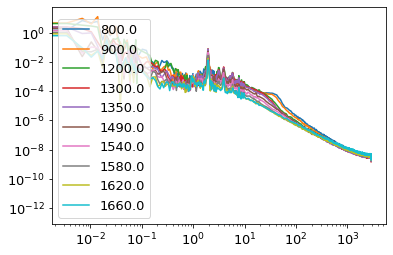

In [94]:
for depth in FREQ.keys():
    plt.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], label=depth)
plt.legend()

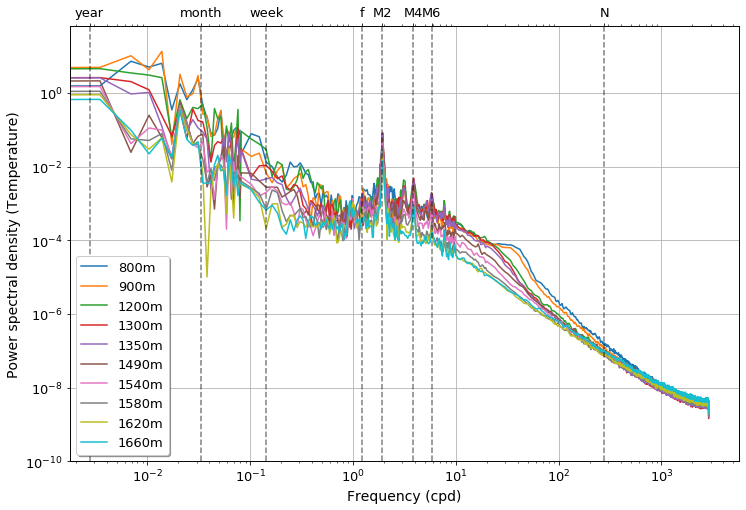

In [95]:
upper_tick_locations = np.array([bvf_lucky_1000, M2, M4, M6, f, week, month, yearly])
upper_tick_labels = ['N', 'M2', 'M4', 'M6', 'f', 'week', 'month', 'year']

x_colors = np.linspace(0,1, 9)
colors = cm.get_cmap('tab10')(x_colors)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for depth in FREQ.keys():
    ax1.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], label=f"{depth:0.0f}m")

ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)
ax1.set_ylim(1e-10,)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
#### SAVE THIS ####

In [86]:
import plot_recipes as plr

In [ ]:
plr.

IndexError: index 9 is out of bounds for axis 0 with size 9

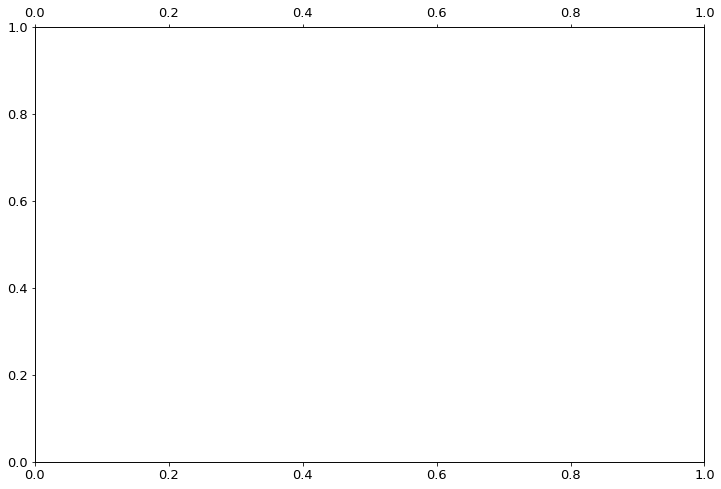

In [41]:
upper_tick_locations = np.array([bvf_lucky_1000, M2, M4, M6, f, week, month, yearly])
upper_tick_labels = ['N', 'M2', 'M4', 'M6', 'f', 'week', 'month', 'year']

x_colors = np.linspace(0,1, 9)
colors = cm.get_cmap('tab10')(x_colors)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
dt = 15/(3600*24)
windows = np.array([2, 10, 35, 49])/dt
lims = [10, 3, 1, 0.08]

#for l, depth in enumerate(rbr_2019):
    
     # convert to days days! the rest is 360s
    
temp = rbr_2019[800]
freq, psd = sg.periodogram(temp, fs=1./dt)
ind, = np.where(freq < lims[-1])
ax2.loglog(freq[ind], psd[ind], alpha=1, c=colors[l])

freq, psd = sg.welch(temp, fs=1./dt, window='hanning', nperseg=windows[0], noverlap=0.15)
ind, = np.where(freq >= lims[0])
ax1.loglog(freq[ind], psd[ind], c=colors[l], label=depth)
ax2.loglog(freq[ind], psd[ind], alpha=0)

# for i in range(1,len(lims)):
#     freq, psd = sg.welch(temp, fs=1./dt, window='hanning', nperseg=windows[i], noverlap=0.15)
#     ind, = np.where(((freq >= lims[i]) & (freq < lims[i-1])))
#     ax1.loglog(freq[ind], psd[ind], c=colors[l])
#     #ax2.loglog(freq[ind], psd[ind], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)
ax1.set_ylim(1e-7, 1e2)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
#### SAVE THIS ####